In [13]:
import luwiji
from luwiji.neural_network import illustration, demo

# Sample Data

In [2]:
import numpy as np 
from sklearn.model_selection import train_test_split

X = np.random.rand(500, 4)
y = np.random.rand(500, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 4), (100, 4), (400, 3), (100, 3))

# Step 1: Dataset & Dataloader

In [5]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [7]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [9]:
train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size=32, shuffle=True)

test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size=32)

# Step 2: Bangun Arsitektur

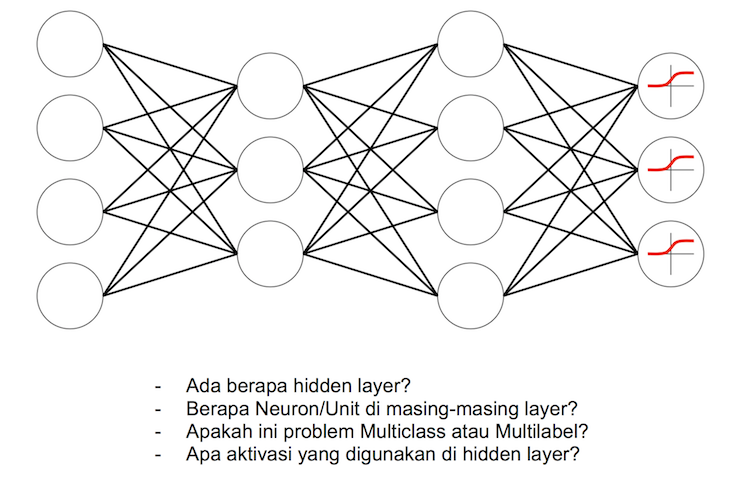

In [14]:
illustration.quiz

In [10]:
from torch import nn

In [15]:
nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid(),
)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

# Step 3: Training Preparation -> MCO

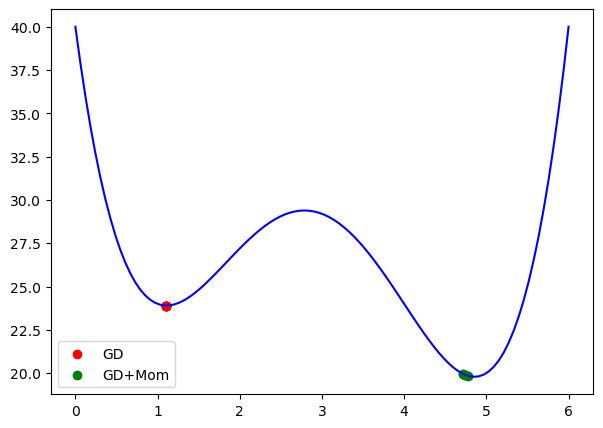

In [16]:
demo.momentum()

In [17]:
from torch import optim

In [19]:
# Model
model = nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid(),
)

# Criterion
criterion = nn.MSELoss() # model diakhiri linear
criterion = nn.NLLLoss() # model diakhiri logsoftmax
criterion = nn.BCELoss() # model diakhiri sigmoid


# Optimizer
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Step 4: Training Loop

In [23]:
epochs = 500
train_cost = []

for i in range(epochs):
    model.train()
    cost = 0
    for feature, target in trainloader:
        output = model(feature)
        loss = criterion(output, target)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        cost += loss.item() * feature.shape[0]
    train_cost.append(cost/len(train_set))

    print(f"\rEpoch: {i+1:4}/{epochs:4} | train_cost: {train_cost[-1]:.4f}", end=" ")

Epoch:  500/ 500 | train_cost: 0.6871 

In [24]:
import matplotlib.pyplot as plt

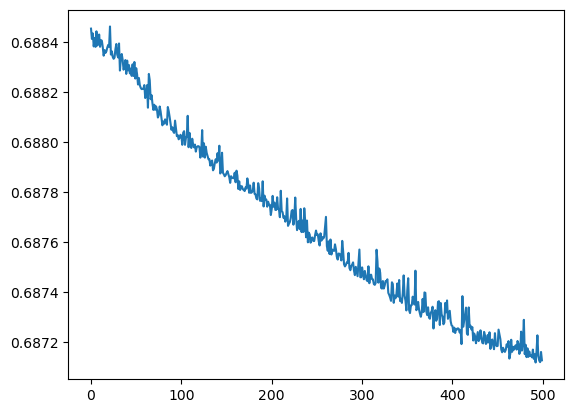

In [25]:
plt.plot(train_cost)